In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer




In [ ]:
#Load The Dataset
df = pd.read_csv('/content/fake_news_detection.csv')

df

,title,text,label,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,The Empire Files: Inside Palestine's Refugee C...,The Empire Files: Inside Palestine's Refugee C...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,New Saudi king ascends to the throne as terror...,At 3 a.m. on a cold desert night earlier this ...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,"With Another Deadline Looming, Whispers Of Ira...","With Another Deadline Looming, Whispers Of Ira...",REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,Donald Trump's Clintonesque foreign policy,In a speech Wednesday outlining his would-be f...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#  Data Pre-Processing & Feature selection
#     ▪ Data Cleaning
#     ▪ Filling Missing values
#     ▪ Noisy Data
#     ▪ Removal of outliners
#     ▪ Transforming categorical variables into numerical variables (or vice versa)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous valid value

# Remove noisy data (e.g., duplicates)
df.drop_duplicates(inplace=True)
# Transform categorical variables into numerical (if needed)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['title'] = label_encoder.fit_transform(df['title'])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


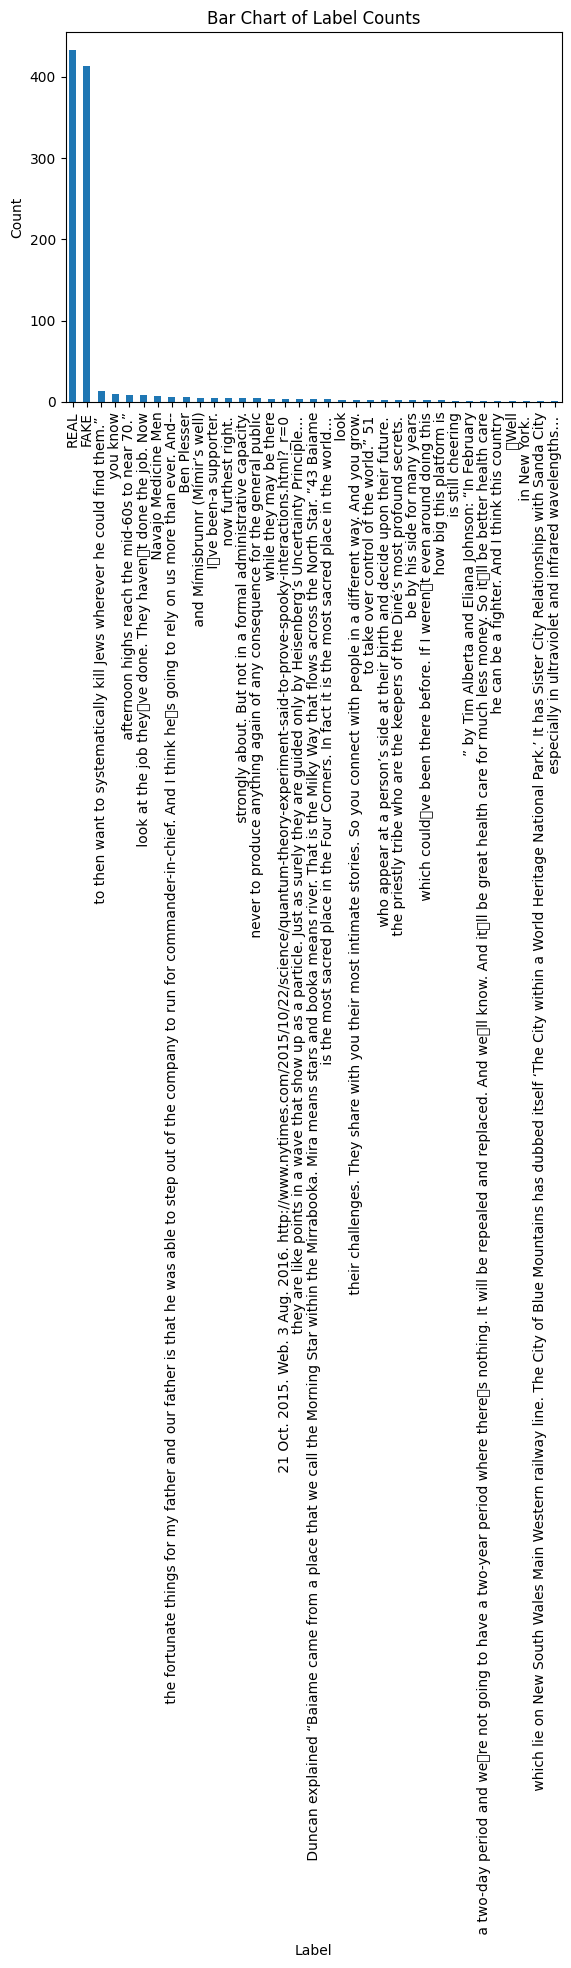

<Figure size 640x480 with 0 Axes>

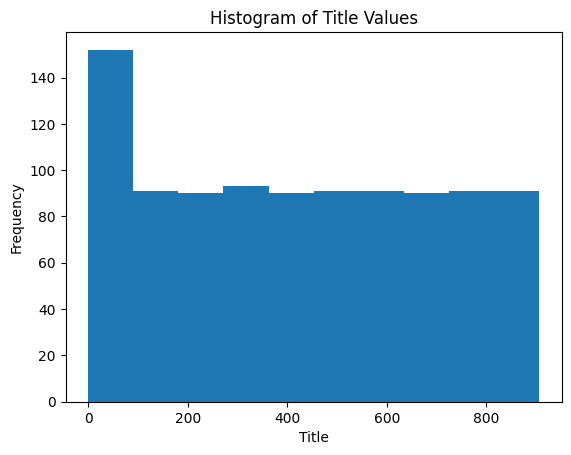

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


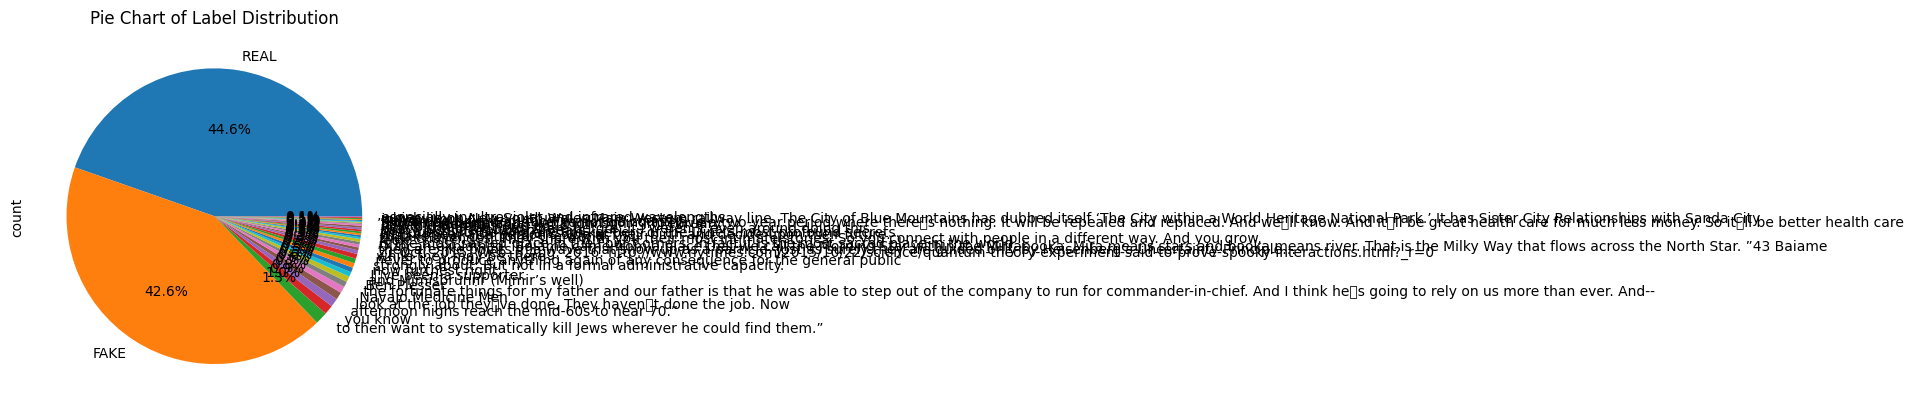

In [ ]:
#  Data Visualization
#     ▪ Bar Chart
#     ▪ Heat Map
#     ▪ Histogram
#     ▪ Pie Chart
#     ▪ Treemap

import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart
plt.figure()
df['label'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
plt.figure()

#Histogram
plt.figure()
plt.hist(df['title'])
plt.title('Histogram of Title Values')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.show()

# Pie Chart
plt.figure()
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Label Distribution')
plt.show()
#TreeMap
import plotly.express as px
fig=px.treemap(df,path=['label'])
fig.show()

In [ ]:
# Splitting and Training the data
#     ▪ 80% → Training Data
#     ▪ 20% → Testing Data

from sklearn.model_selection import train_test_split

# Assuming 'text' is the feature and 'label' is the target variable
X = df['text']
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust

In [ ]:
#Load the Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with 'text' and 'label' columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Scale the features
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and fit the SVM model
model = SVC()
model.fit(X_train, y_train)


SVC()

In [ ]:
#Evaluating the Model:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [ ]:
#Build The Predictive Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')
if accuracy >= 0.75:
    print("Model accuracy is satisfactory. Proceeding.")
else:
    print("Model accuracy is below 75%. Consider changing the algorithm or improving data quality.")

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.8247422680412371
Precision: 0.796261639233613
Recall: 0.7981867779204108
F1 Score: 0.7881602401726241


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# DEPLOY THE MODEL
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating Multinomial Naive Bayes model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC()
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)

Training and evaluating Multinomial Naive Bayes model...
Accuracy: 0.6134
Precision: 0.7744
Recall: 0.6134
F1-score: 0.6623

Training and evaluating Support Vector Machine model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.5825
Precision: 0.4755
Recall: 0.5825
F1-score: 0.5137


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a list of hyperparameters to search over
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Test accuracy:', grid_search.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.1

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test accuracy: 0.8247422680412371


In [ ]:
from joblib import dump

dump(clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from flask import Flask, request, render_template
from joblib import load
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

clf = load('model.joblib')
vectorizer = load('vectorizer.joblib')
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

        # Join the words back into a string
    text = ' '.join(words)

    return text


In [ ]:
text=input()


hello,fribbsjb,spafjhnjsdn


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocessed_text = preprocess_text(text)
X = vectorizer.transform([preprocessed_text])
y_pred = clf.predict(X)
if y_pred[0]== 1:
    result = 'real'
else:
    result = 'fake'
print(result)

fake
